In [1]:
import Aluminum

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import itertools

print(Aluminum.pseudo_name_list)

['Al.rel-pbe-paw.UPF', 'Al.rel-pbesol-uspp.UPF', 'Al.pz-vbc.UPF', 'Al.pbe-uspp.UPF']


In [10]:
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
#     'font.size' : 14.4,
    'font.size' : 17.28,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

%matplotlib notebook

# Optimization of scf parameters

In [3]:
df = Aluminum.make_bulk_scf_df_template()
df.keys()

Index(['pseudo_name', 'a_0', 'ecutwfc', 'ecutrho_r', 'degauss', 'mixing_beta',
       'conv_thr_o', 'n_k_points', 'cell_volume', 'pressure', 'total_energy',
       'n_it', 'sim_time'],
      dtype='object')

In [ ]:
work_dir = 'bulk'
pseudo_name = Aluminum.pseudo_name_list[-1]
a_0 = 7.6
ecutwfc = 60
ecutrho_r = 4
degauss_s = np.linspace(0.001,0.101,20)
mixing_beta = 0.7
conv_thr_o = -8
n_k_points_s = np.arange(4,15)

print('launching %d simulations' %(len(degauss_s)*len(n_k_points_s)))
for degauss,n_k_points in tqdm(itertools.product(degauss_s,n_k_points_s)):
    Aluminum.bulk_sim_scf(work_dir=work_dir,save_df=df,
                          pseudo_name=pseudo_name,a_0=a_0,ecutwfc=ecutwfc,
                          ecutrho_r=ecutrho_r,degauss=degauss,mixing_beta=mixing_beta,
                          conv_thr_o=conv_thr_o,n_k_points=n_k_points)


df.to_csv(work_dir+'/optimizing_degauss_rel.csv',index=False)

0it [00:00, ?it/s]

launching 220 simulations


9it [01:11, 12.06s/it]

<IPython.core.display.Javascript object>


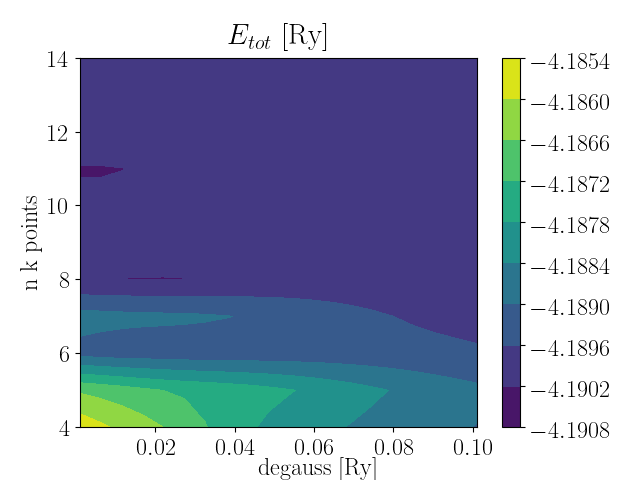

In [94]:
key = 'total_energy'
# key = 'sim_time'

name = 'bulk_degauss-n_k'

z = np.array(df[key]).reshape(len(degauss_s),len(n_k_points_s)).T

fig,ax = plt.subplots()
plt.contourf(degauss_s,n_k_points_s,z)
plt.colorbar()
plt.xlabel('degauss [Ry]')
plt.ylabel('n k points')
plt.title('$E_{tot}$ [Ry]')

ax.xaxis.set_label_coords(0.6,-0.08)

# fig.savefig('report/img/%s.pgf' %name)
# fig.savefig('report/img/%s.png' %name)

<IPython.core.display.Javascript object>


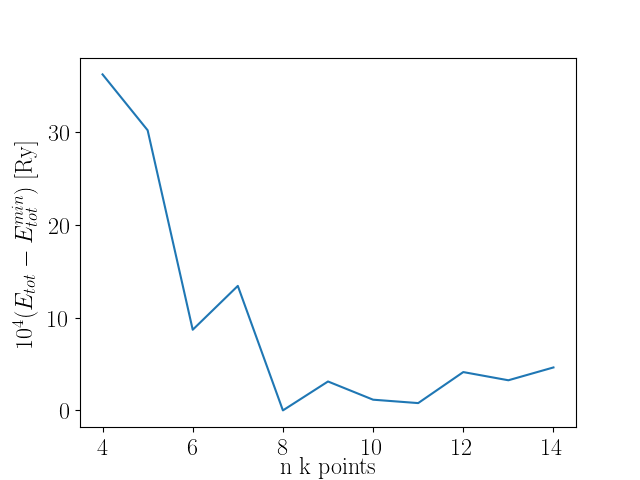

In [98]:
key = 'total_energy'
degauss_value = 0.02

name = 'bulk_n_k'

x = [df['n_k_points'][i] for i in range(len(df)) if np.abs(df['degauss'][i] - degauss_value) < 3e-3]
y = [df[key][i] for i in range(len(df)) if np.abs(df['degauss'][i] - degauss_value) < 3e-3]

y = (np.array(y) - np.min(y))*10**4

fig,ax = plt.subplots()
plt.plot(x,y)
plt.xlabel('n k points')
plt.ylabel('$10^4(E_{tot} - E_{tot}^{min})$ [Ry]')

ax.xaxis.set_label_coords(0.5,-0.08)

# fig.savefig('report/img/%s.pgf' %name)
# fig.savefig('report/img/%s.png' %name)

<IPython.core.display.Javascript object>


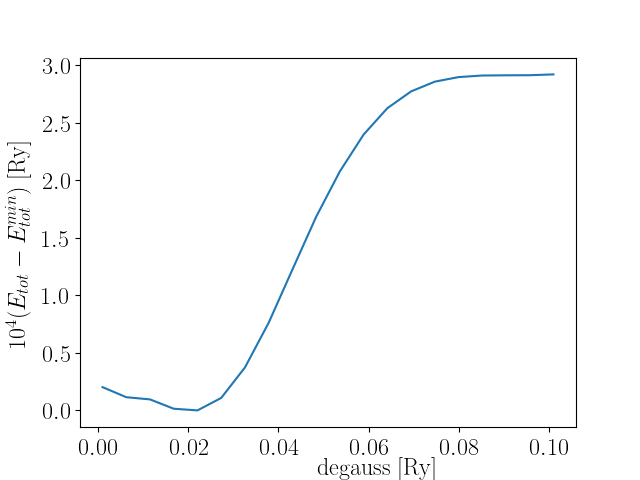

In [92]:
key = 'total_energy'
n_k_points_value = 8

name = 'bulk_degauss'

x = [df['degauss'][i] for i in range(len(df)) if df['n_k_points'][i] == n_k_points_value]
y = [df[key][i] for i in range(len(df)) if df['n_k_points'][i] == n_k_points_value]

y = (np.array(y) - np.min(y))*10**4

fig,ax = plt.subplots()
plt.plot(x,y)
plt.xlabel('degauss [Ry]')
plt.ylabel('$10^4(E_{tot} - E_{tot}^{min})$ [Ry]')

ax.xaxis.set_label_coords(0.6,-0.08)

# fig.savefig('report/img/%s.pgf' %name)
# fig.savefig('report/img/%s.png' %name)

In [4]:
work_dir = 'bulk'
pseudo_name = Aluminum.pseudo_name_list[-1]
a_0 = 7.6
ecutwfcs = np.arange(20,140,20)
ecutrho_rs = np.arange(4,12,2)
degauss = 0.02
mixing_beta = 0.7
conv_thr_o = -8
n_k_points = 10

print('launching %d simulations' %(len(ecutwfcs)*len(ecutrho_rs)))
for ecutwfc,ecutrho_r in tqdm(itertools.product(ecutwfcs,ecutrho_rs)):
    Aluminum.bulk_sim_scf(work_dir=work_dir,save_df=df,name='Al-bulk-test2',prefix='Abt2',
                          pseudo_name=pseudo_name,a_0=a_0,ecutwfc=ecutwfc,
                          ecutrho_r=ecutrho_r,degauss=degauss,mixing_beta=mixing_beta,
                          conv_thr_o=conv_thr_o,n_k_points=n_k_points)


df.to_csv(work_dir+'/optimizing_ecut_rel.csv',index=False)

0it [00:00, ?it/s]

launching 24 simulations


24it [06:31, 35.05s/it]


<IPython.core.display.Javascript object>


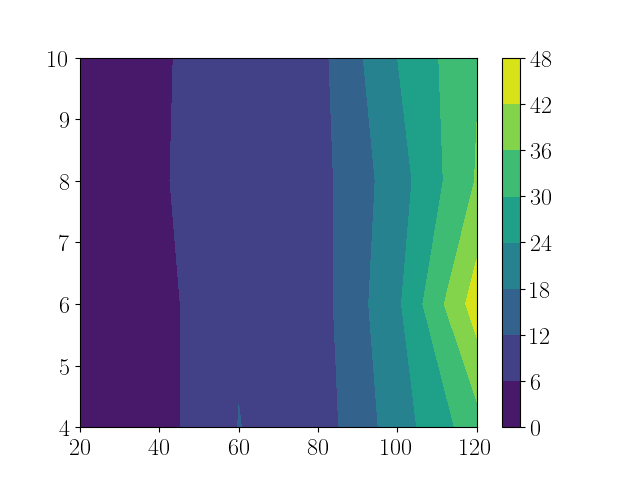

In [13]:
key = 'total_energy'
# key = 'sim_time'

z = np.array(df[key]).reshape(len(ecutwfcs),len(ecutrho_rs)).T - np.min(df[key])

plt.figure()
plt.contourf(ecutwfcs,ecutrho_rs,z)
plt.colorbar()

<IPython.core.display.Javascript object>


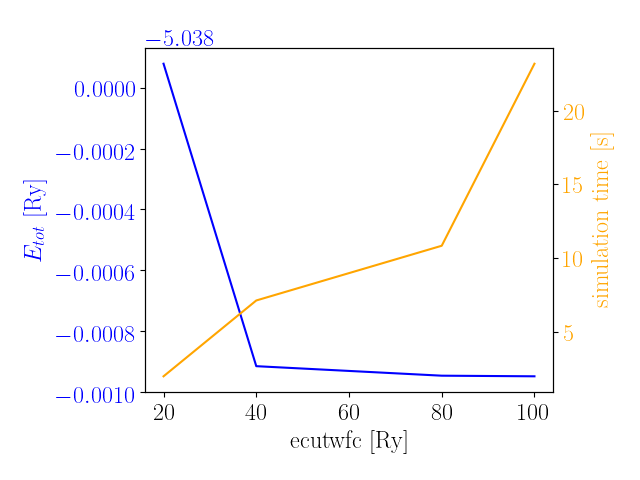

In [19]:
name = 'bulk_ecutwfc_rel'

fig,ax = plt.subplots()
color='blue'
ax.plot(df['ecutwfc'][::6],df['total_energy'][::6],color=color)
ax.set_xlabel('ecutwfc [Ry]')
ax.set_ylabel('$E_{tot}$ [Ry]',color=color)
ax.tick_params(axis='y',labelcolor=color)

color='orange'
ax2 = ax.twinx()
ax2.plot(df['ecutwfc'][::6],df['sim_time'][::6],color=color)
ax2.set_ylabel('simulation time [s]',color=color)
ax2.tick_params(axis='y',labelcolor=color)

fig.tight_layout()

fig.savefig('report/img/%s.pgf' %name)
fig.savefig('report/img/%s.png' %name)

In [100]:
work_dir = 'bulk'
pseudo_name = Aluminum.pseudo_name_list[-2]
a_0 = 7.6
ecutwfc = 60
ecutrho_r = 4
degauss = 0.02
mixing_beta_s = np.arange(0.1,1,0.1)
conv_thr_o_s = np.arange(-9,-3)
n_k_points = 8

print('launching %d simulations' %(len(mixing_beta_s)*len(conv_thr_o_s)))
for mixing_beta,conv_thr_o in tqdm(itertools.product(mixing_beta_s,conv_thr_o_s)):
    Aluminum.bulk_sim_scf(work_dir=work_dir,save_df=df,
                          pseudo_name=pseudo_name,a_0=a_0,ecutwfc=ecutwfc,
                          ecutrho_r=ecutrho_r,degauss=degauss,mixing_beta=mixing_beta,
                          conv_thr_o=conv_thr_o,n_k_points=n_k_points)


df.to_csv(work_dir+'/optimizing_electrons.csv',index=False)

0it [00:00, ?it/s]

launching 54 simulations


54it [03:55,  3.70s/it]


<IPython.core.display.Javascript object>


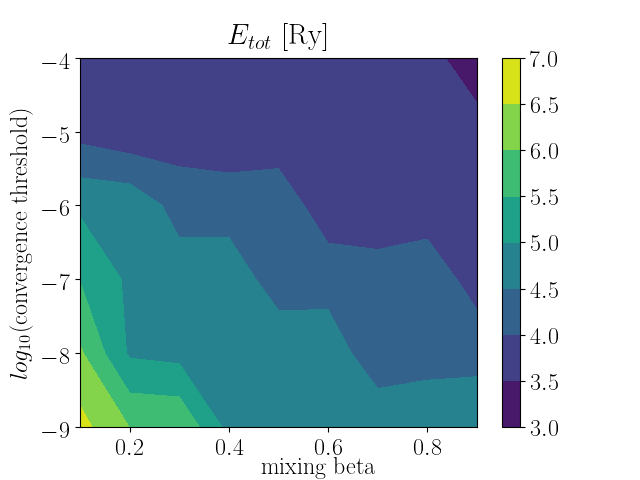

In [109]:
key = 'total_energy'
key = 'sim_time'

name = 'bulk_electrons'

z = np.array(df[key]).reshape(len(mixing_beta_s),len(conv_thr_o_s)).T

fig,ax = plt.subplots()
plt.contourf(mixing_beta_s,conv_thr_o_s,z)
plt.colorbar()
plt.xlabel('mixing beta')
plt.ylabel('$log_{10}$(convergence threshold)')
plt.title('$E_{tot}$ [Ry]')

ax.xaxis.set_label_coords(0.6,-0.08)

# fig.savefig('report/img/%s.pgf' %name)
# fig.savefig('report/img/%s.png' %name)

# Equilibrium lattice constant and bulk modulus

In [14]:
work_dir = 'bulk'
pseudo_name = Aluminum.pseudo_name_list[-2]
a_0_s = np.linspace(7.467,7.471,200)
ecutwfc = 60
ecutrho_r = 4
degauss = 0.02
mixing_beta = 0.7
conv_thr_o = -8
n_k_points = 8

for a_0 in tqdm(a_0_s):
    Aluminum.bulk_sim_scf(work_dir=work_dir,save_df=df,
                          pseudo_name=pseudo_name,a_0=a_0,ecutwfc=ecutwfc,
                          ecutrho_r=ecutrho_r,degauss=degauss,mixing_beta=mixing_beta,
                          conv_thr_o=conv_thr_o,n_k_points=n_k_points)


df.to_csv(work_dir+'/optimizing_a_mega_fine.csv',index=False)

100%|██████████| 200/200 [13:25<00:00,  4.60s/it]


<IPython.core.display.Javascript object>


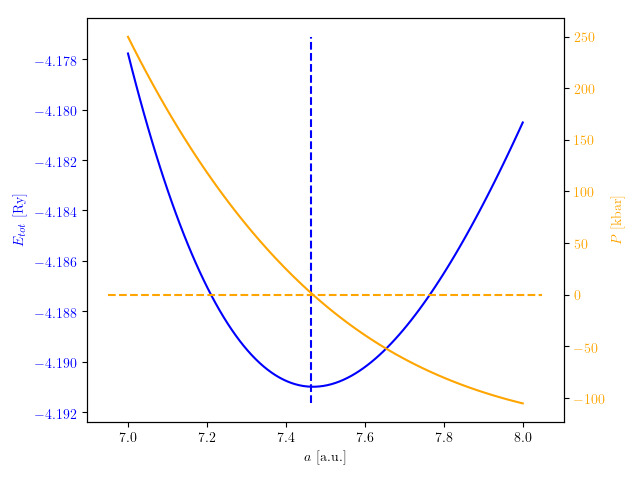

In [19]:
fig, ax1 = plt.subplots()

name = 'bulk_a_mega_fine'

color = 'blue'
ax1.plot(df['a_0'],df['total_energy'],color=color)
ax1.set_xlabel('$a$ [a.u.]')
ax1.set_ylabel('$E_{tot}$ [Ry]', color=color)
ax1.tick_params(axis='y',labelcolor=color)
ax1.plot([df['a_0'][np.argmin(np.array(df['total_energy']))]]*2,ax1.get_ylim(),linestyle='dashed',color=color)

ax2 = ax1.twinx()
color = 'orange'

ax2.plot(df['a_0'],df['pressure'],color=color)
ax2.set_ylabel('$P$ [kbar]', color=color)
ax2.tick_params(axis='y',labelcolor=color)
ax2.plot(ax2.get_xlim(),[0,0],linestyle='dashed',color=color)

fig.tight_layout()

# fig.savefig('report/img/%s.pgf' %name)
# fig.savefig('report/img/%s.png' %name)

1.3

In [24]:
import scipy.optimize as op
import uncertainties as unc

@np.vectorize
def murnaghan(v,v_0,k_0,dk_0):
    return k_0/dk_0*((v/v_0)**(-dk_0) - 1.)

<IPython.core.display.Javascript object>


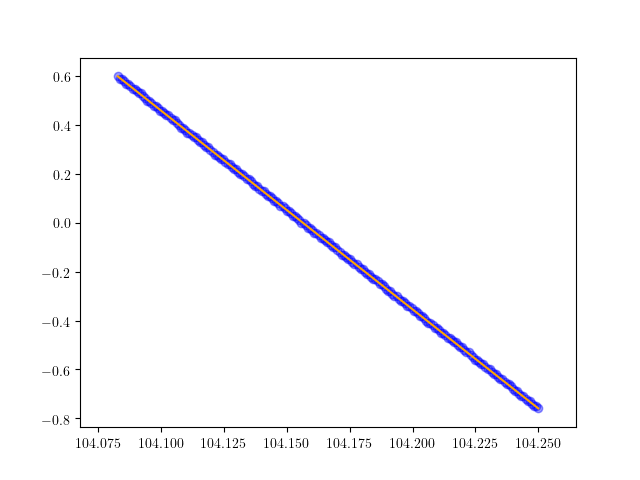

104.15639+/-0.00004 847.0+/-0.5 3.2+/-2.5
7.4687619+/-0.0000009


In [43]:
df = pd.read_csv(work_dir+'/optimizing_a_mega_fine.csv')

vs = np.array(df['cell_volume'])
ps = np.array(df['pressure'])
v_0 = df['cell_volume'][np.argmin(np.array(df['total_energy']))]

popt,pcov = op.curve_fit(murnaghan, vs, ps, p0=[v_0,1000.,5.])
v_0,k_0,dk_0 = unc.correlated_values(popt,pcov)

fig,ax = plt.subplots()
plt.scatter(vs,ps, alpha=0.4, color='blue', label='data')
plt.plot(vs,murnaghan(vs,*popt), color='orange', label='fit')

print(v_0,k_0,dk_0)
a = df['a_0'][0]*(v_0/df['cell_volume'][0])**(1/3)
print(a)

v_0, k_0, dk_0
a


pseudo_name = Al.pz-vbc.UPF

coarse
104.241+/-0.030 812.3+/-1.6 4.488+/-0.032
7.4708+/-0.0007

fine
104.1385+/-0.0017 841.03+/-0.21 4.726+/-0.012
7.46834+/-0.00004

ultra fine
104.15639+/-0.00004 847.03+/-0.04 4.640+/-0.024
7.4687623+/-0.0000009

mega fine
104.15639+/-0.00004 847.0+/-0.5 3.2+/-2.5
7.4687619+/-0.0000009